<a href="https://colab.research.google.com/github/vladjkezor/Python-for-data-analysis/blob/hw_4/hw_4_Savin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [281]:
df = pd.read_csv('/content/drive/MyDrive/Data for colab/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


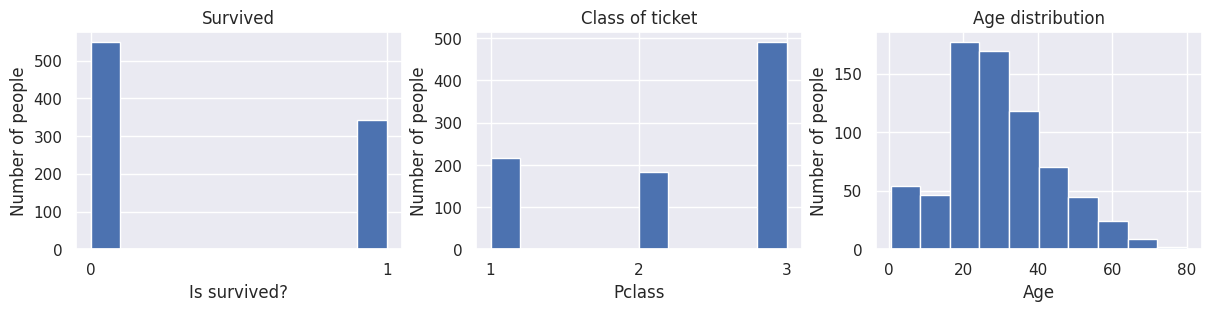

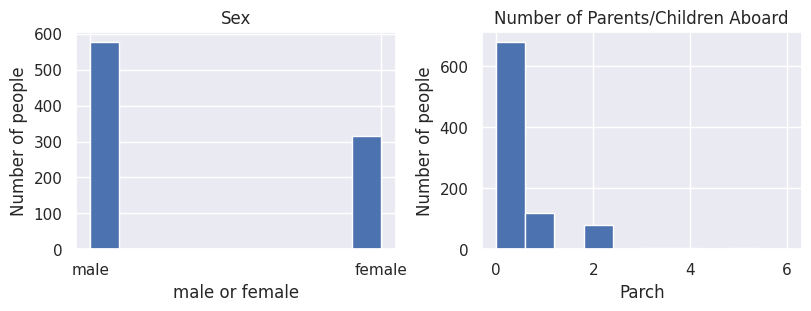

In [282]:
fig, axs1 = plt.subplots(1,3, layout='constrained')
fig.set_size_inches(12,3)
axs1[0].hist(df['Survived'].dropna())
axs1[0].set(xlabel="Is survived?", ylabel="Number of people", xticks=[0, 1], title='Survived')

axs1[1].hist(df['Pclass'].dropna())
axs1[1].set(xlabel="Pclass", ylabel="Number of people", xticks=[1, 2, 3], title='Class of ticket')

axs1[2].hist(df['Age'].dropna())
axs1[2].set( xlabel="Age", ylabel="Number of people", title='Age distribution')

fig, axs2 = plt.subplots(1,2, layout='constrained')
fig.set_size_inches(8,3)

axs2[0].hist(df['Sex'].dropna())
axs2[0].set(xlabel="male or female", ylabel="Number of people", title='Sex')

axs2[1].hist(df['Parch'].dropna())
axs2[1].set(xlabel="Parch", ylabel="Number of people", title='Number of Parents/Children Aboard')
plt.show()



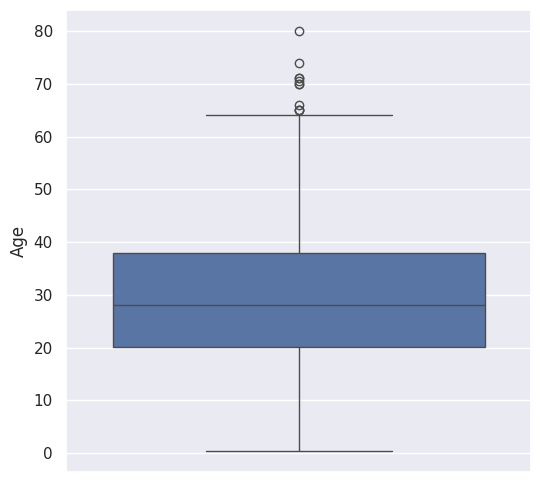

In [283]:
sns.set(rc={'figure.figsize':(6, 6)},)
sns.boxplot(df['Age'].dropna())
plt.show()


* Большинство пассажиров находятся в возрасте от 20 до 40 лет
* 50% пассажиров моложе примерно 30 лет, а другие 50% старше
* Есть несколько людей старше 60




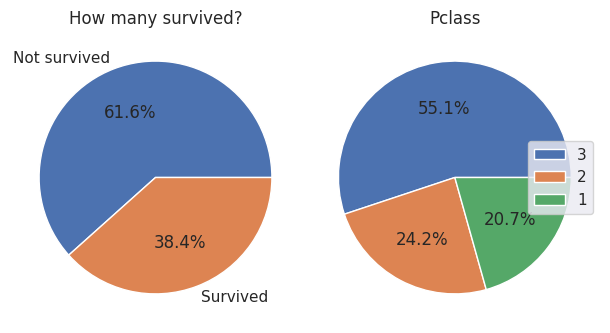

In [284]:
fig, ax = plt.subplots(1,2, layout='constrained')

ax[0].pie(df['Survived'].value_counts(), labels=['Not survived', 'Survived'], autopct='%1.1f%%')
ax[0].set_title('How many survived?')

ax[1].pie(df['Pclass'].value_counts(), labels=['3', '2','1'], autopct='%1.1f%%', labeldistance=None)
ax[1].set(title='Pclass')
ax[1].legend(loc='right')
plt.show()


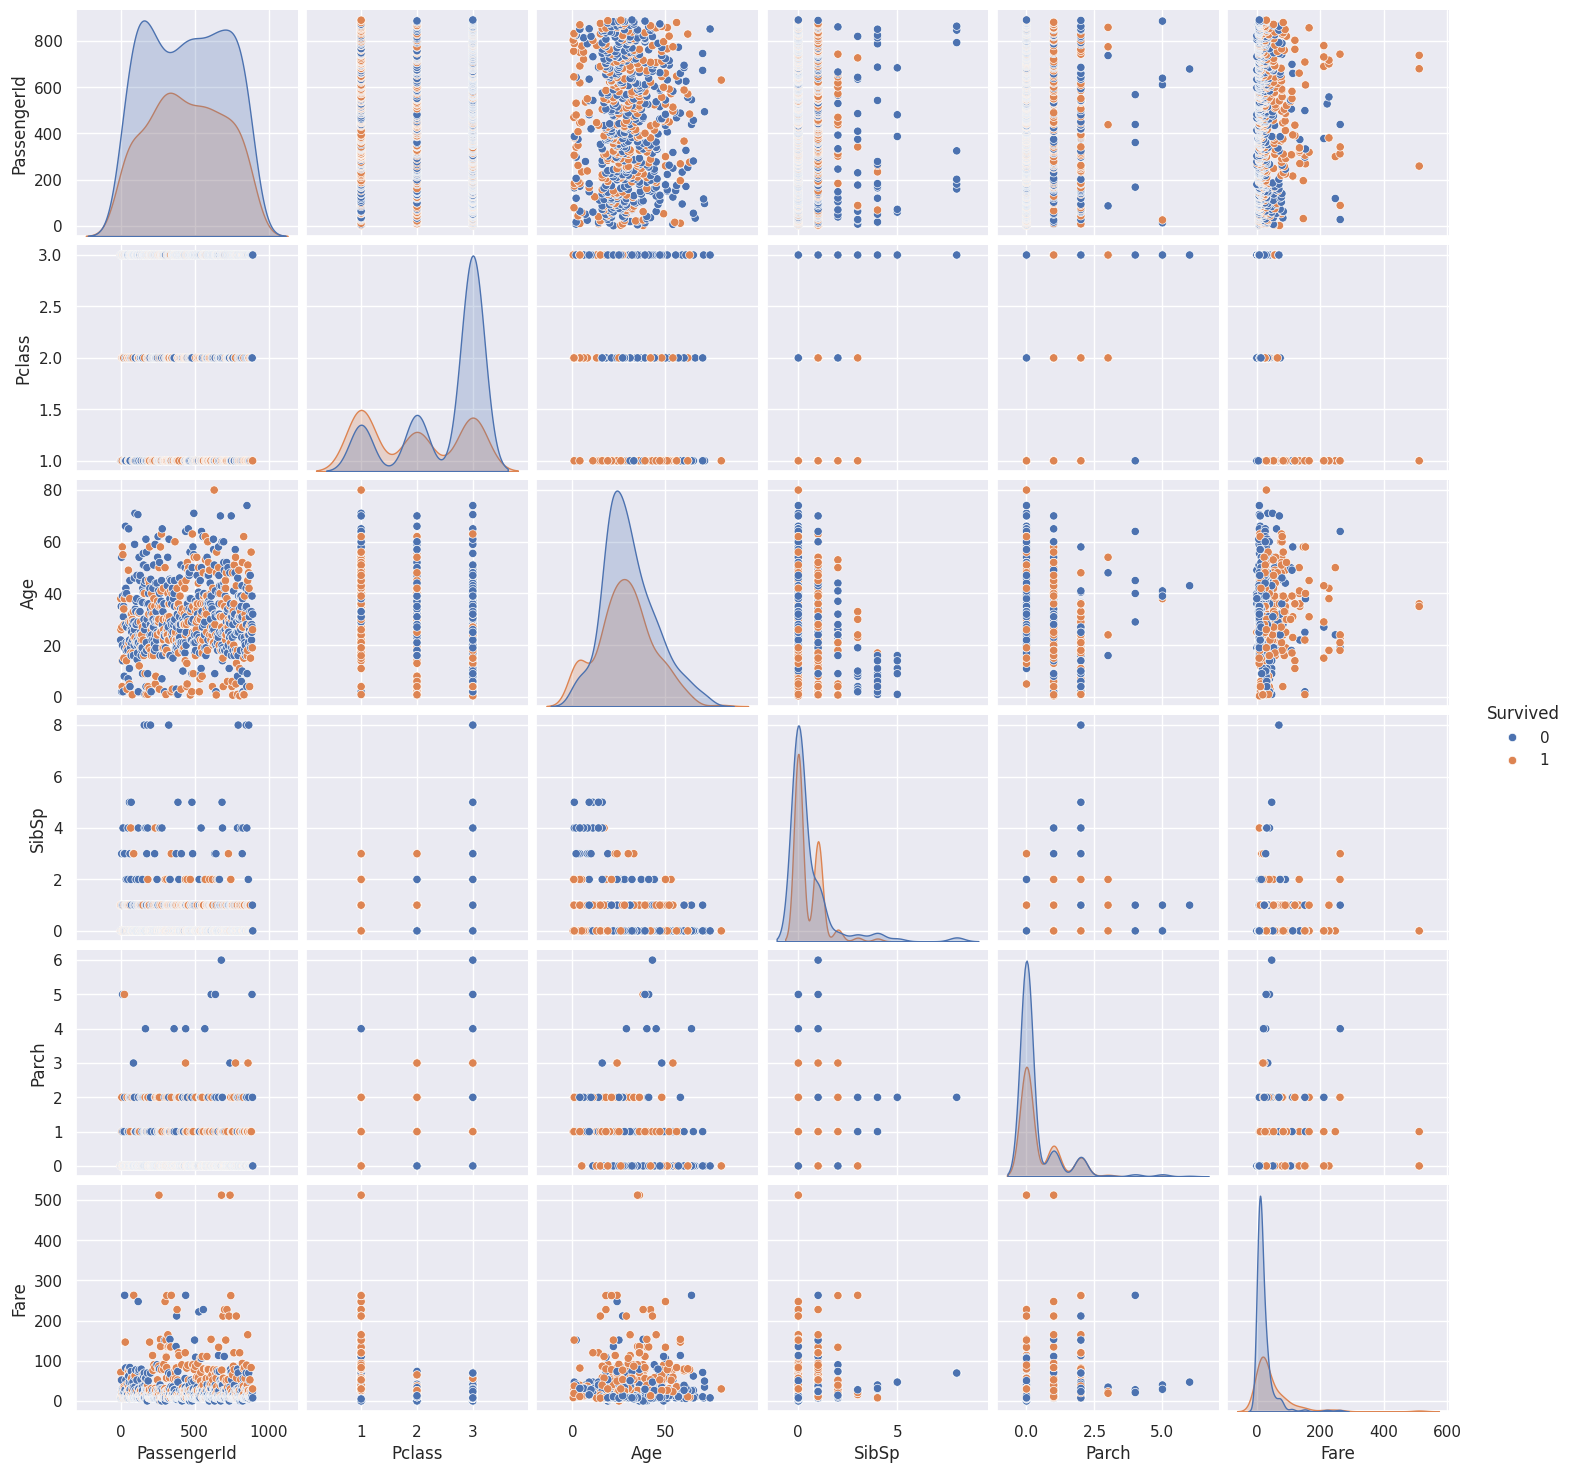

In [285]:
sns.pairplot(df, hue='Survived')

In [286]:
data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
fig = px.sunburst(
    data,
    path=['Pclass', 'Sex',],
    values='count',
    title='Passengers by Class and Sex',
    labels={'count': 'Number of Passengers'},
    )
fig.show()